# IAPEz-int, IAPLTR1a_Mm, IAPLTR1_Mm within CHM candidates 2kb

In [1]:
import subprocess
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = 'Arial'
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline

In [3]:
%%bash
cd ~/CHMsInOtherContexts/CellStateTransition/EarlyEmbryogenesis/CHMs
for stage in 2cell 8cell Morula ICM;do
    ln -sf /mnt/Storage/home/yanghui/imprinting/result.2021/Filtering/CpGrichedHighMethylH3K9me3/Hybrid/ChromHMM/Separate/${stage}/Output_Cooccupancy_Methyl0.5_TreatOnlyPValue0.0001_CpGNumber6/${stage}.CpGrichedHighMethylH3K9me3.merged2kb.len600bp.bed ./${stage}_200bp.CHM.bed
done

In [3]:
%%bash
cd ~/CHMsInOtherContexts/CellStateTransition/CHMOrganization/Universal_specific/Features/overlap_IAP3subF
for subfamily in 'IAPEz-int' 'IAPLTR1a_Mm' 'IAPLTR1_Mm';do
    awk -v X_value=${subfamily} 'BEGIN{FS=OFS="\t"}{print $0, X_value"."NR}' /mnt/Storage/home/yanghui/annotations/mm10/Repeats/LTR/ERVK/mm10_euch.${subfamily}.merged.bed > mm10_euch.${subfamily}.merged.num.bed
    
done

In [4]:
%%bash

win_bed(){
    cd ~/CHMsInOtherContexts/CellStateTransition/CHMOrganization/Universal_specific/Features/overlap_IAP3subF/stage_CHMs
    process=$1
    stages=$2
    for stage in $stages;do
        for subfamily in 'IAPEz-int' 'IAPLTR1a_Mm' 'IAPLTR1_Mm';do
            windowBed -w 2000 -c -a ../mm10_euch.${subfamily}.merged.num.bed -b ~/CHMsInOtherContexts/CellStateTransition/${process}/CHMs/${stage}_200bp.CHM.bed > ${subfamily}_wi_${process}_${stage}_CHM_2k.bed
        done
    done
}


win_bed EarlyEmbryogenesis "2cell 8cell Morula ICM"
win_bed PGCsDevelopment "E10.5 E13.5_female E13.5_male"
win_bed Spermatogenesis "US DS PS RS"
win_bed RetinalDevelopment "E14.5 E17.5 P0 P3 P7 P10 P14 P21"
win_bed HeartDevelopment "E10.5 E11.5 E12.5 E13.5 E14.5 E15.5 E16.5 P0"
win_bed LiverDevelopment "E11.5 E12.5 E13.5 E14.5 E15.5 E16.5 P0"


In [7]:
stage_dict = {
    'EarlyEmbryogenesis': ['2cell','8cell','Morula','ICM',],
    'PGCsDevelopment': ['E10.5','E13.5_female','E13.5_male',],
    'Spermatogenesis': ['US','DS','PS','RS',],
    'RetinalDevelopment': ['E14.5','E17.5','P0','P3','P7','P10','P14','P21',],
    'HeartDevelopment': ['E10.5','E11.5','E12.5','E13.5','E14.5','E15.5','E16.5','P0',],
    'LiverDevelopment': ['E11.5','E12.5','E13.5','E14.5','E15.5','E16.5','P0']
}

In [11]:
df_3sub

,IAP_num,EarlyEmbryogenesis_2cell
0,IAPEz-int.1,1
1,IAPEz-int.2,1
2,IAPEz-int.3,1
3,IAPEz-int.4,1
4,IAPEz-int.5,1
...,...,...
1548,IAPLTR1_Mm.1549,1
1549,IAPLTR1_Mm.1550,1
1550,IAPLTR1_Mm.1551,1
1551,IAPLTR1_Mm.1552,1


In [14]:
IAP_ov_process_stage_df

""


In [15]:
os.chdir("/mnt/Storage/home/wangyiman/CHMsInOtherContexts/CellStateTransition/CHMOrganization/Universal_specific/Features/overlap_IAP3subF/stage_CHMs")
IAP_ov_process_stage_df = pd.DataFrame()
i = 0
for process in stage_dict.keys() :
    for stage in stage_dict[process] :
        df_3sub = pd.DataFrame()
        i += 1
        for subfamily in ['IAPEz-int', 'IAPLTR1a_Mm', 'IAPLTR1_Mm'] :
            df = pd.read_csv(
                f'{subfamily}_wi_{process}_{stage}_CHM_2k.bed',
                sep = "\t",
                header = None,
                usecols = [3,4]
                       )
            df.columns = ['IAP_num', f'{process}_{stage}']
            df_3sub = pd.concat([df_3sub, df])
        if i == 1 :
            IAP_ov_process_stage_df = df_3sub.reset_index().drop('index', axis = 1)
        else :
            IAP_ov_process_stage_df = pd.merge(IAP_ov_process_stage_df, df_3sub.reset_index().drop('index', axis = 1), on = 'IAP_num')

IAP_ov_process_stage_df

,IAP_num,EarlyEmbryogenesis_2cell,EarlyEmbryogenesis_8cell,EarlyEmbryogenesis_Morula,EarlyEmbryogenesis_ICM,PGCsDevelopment_E10.5,PGCsDevelopment_E13.5_female,PGCsDevelopment_E13.5_male,Spermatogenesis_US,Spermatogenesis_DS,...,HeartDevelopment_E15.5,HeartDevelopment_E16.5,HeartDevelopment_P0,LiverDevelopment_E11.5,LiverDevelopment_E12.5,LiverDevelopment_E13.5,LiverDevelopment_E14.5,LiverDevelopment_E15.5,LiverDevelopment_E16.5,LiverDevelopment_P0
0,IAPEz-int.1,1,2,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,IAPEz-int.2,1,2,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,IAPEz-int.3,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,0,0,1,1
3,IAPEz-int.4,1,1,1,1,1,1,1,1,1,...,0,1,0,0,1,0,1,0,0,0
4,IAPEz-int.5,1,1,1,1,1,1,2,1,1,...,0,1,1,0,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7028,IAPLTR1_Mm.1549,1,1,1,1,1,1,1,1,1,...,1,1,0,1,1,1,1,1,1,1
7029,IAPLTR1_Mm.1550,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,0,0
7030,IAPLTR1_Mm.1551,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
7031,IAPLTR1_Mm.1552,1,1,1,1,1,1,0,1,1,...,0,1,1,0,0,0,0,1,0,0


In [16]:
IAP_ov_process_stage_df.index = IAP_ov_process_stage_df['IAP_num']
IAP_ov_process_stage_df = IAP_ov_process_stage_df.drop('IAP_num', axis = 1)

In [17]:
IAP_ov_process_stage_df = IAP_ov_process_stage_df.mask(IAP_ov_process_stage_df > 1, 1)
IAP_ov_process_stage_df['mean'] = IAP_ov_process_stage_df.sum(axis = 1)
# IAP_ov_process_stage_df = IAP_ov_process_stage_df.sort_values(IAP_ov_process_stage_df.columns.tolist(), ascending = False)
IAP_ov_process_stage_df = IAP_ov_process_stage_df.sort_values('mean', ascending = False).drop('mean', axis = 1)
IAP_ov_process_stage_df

,EarlyEmbryogenesis_2cell,EarlyEmbryogenesis_8cell,EarlyEmbryogenesis_Morula,EarlyEmbryogenesis_ICM,PGCsDevelopment_E10.5,PGCsDevelopment_E13.5_female,PGCsDevelopment_E13.5_male,Spermatogenesis_US,Spermatogenesis_DS,Spermatogenesis_PS,...,HeartDevelopment_E15.5,HeartDevelopment_E16.5,HeartDevelopment_P0,LiverDevelopment_E11.5,LiverDevelopment_E12.5,LiverDevelopment_E13.5,LiverDevelopment_E14.5,LiverDevelopment_E15.5,LiverDevelopment_E16.5,LiverDevelopment_P0
IAP_num,,,,,,,,,,,,,,,,,,,,,
IAPEz-int.1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
IAPEz-int.2865,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
IAPLTR1a_Mm.411,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
IAPLTR1a_Mm.1443,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
IAPLTR1a_Mm.1442,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
IAPEz-int.896,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
IAPEz-int.2707,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
IAPLTR1a_Mm.532,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
IAP_woCHM = IAP_ov_process_stage_df.loc[IAP_ov_process_stage_df.sum(axis = 1) == 0].reset_index()
IAP_num_bed = pd.DataFrame()
for subfamily in ['IAPEz-int', 'IAPLTR1a_Mm', 'IAPLTR1_Mm'] :
    df = pd.read_csv(
        f'/mnt/Storage/home/wangyiman/CHMsInOtherContexts/CellStateTransition/CHMOrganization/Universal_specific/Features/overlap_IAP3subF/mm10_euch.{subfamily}.merged.num.bed',
        sep = "\t",
        header = None,
        names = ['chr', 'start', 'end', 'IAP_num'])
    IAP_num_bed = pd.concat([IAP_num_bed, df])
                    
IAP_woCHM = pd.merge(IAP_woCHM.iloc[:,0], IAP_num_bed, on = "IAP_num")
IAP_woCHM['order'] = IAP_woCHM['IAP_num'].str.split('.', expand = True)[1].astype(int)
IAP_woCHM = IAP_woCHM.sort_values(['order'])
IAP_woCHM[['chr', 'start', 'end', 'IAP_num']].to_csv(
    '/mnt/Storage/home/wangyiman/CHMsInOtherContexts/CellStateTransition/CHMOrganization/Universal_specific/Features/overlap_IAP3subF/stage_CHMs/IAP3subF_nonCHMnearby_2kb.bed',
    sep = "\t",
    header = False,
    index = False
)
IAP_woCHM

,IAP_num,chr,start,end,order
49,IAPLTR1_Mm.206,chr10,127987934,127988079,206
15,IAPLTR1a_Mm.334,chr12,3033748,3034081,334
56,IAPLTR1a_Mm.360,chr12,51453544,51453878,360
26,IAPLTR1a_Mm.461,chr13,74823322,74823355,461
37,IAPLTR1_Mm.478,chr14,64182796,64182954,478
...,...,...,...,...,...
19,IAPEz-int.3316,chr7,98465516,98465692,3316
22,IAPEz-int.3317,chr7,98926195,98926405,3317
35,IAPEz-int.3467,chr8,66080135,66080703,3467
44,IAPEz-int.3528,chr8,104714090,104714188,3528


In [29]:
IAP_ov_process_stage_df.reset_index()['IAP_num'].str.split('.', expand = True)[0] 

0         IAPEz-int
1         IAPEz-int
2       IAPLTR1a_Mm
3       IAPLTR1a_Mm
4       IAPLTR1a_Mm
           ...     
7028      IAPEz-int
7029      IAPEz-int
7030    IAPLTR1a_Mm
7031    IAPLTR1a_Mm
7032     IAPLTR1_Mm
Name: 0, Length: 7033, dtype: object

In [31]:
IAP_ov_process_stage_df.reset_index()['IAP_num'].str.split('.', expand = True)[0] == subfamily

0        True
1        True
2       False
3       False
4       False
        ...  
7028     True
7029     True
7030    False
7031    False
7032    False
Name: 0, Length: 7033, dtype: bool

In [32]:
IAP_ov_process_stage_df

,EarlyEmbryogenesis_2cell,EarlyEmbryogenesis_8cell,EarlyEmbryogenesis_Morula,EarlyEmbryogenesis_ICM,PGCsDevelopment_E10.5,PGCsDevelopment_E13.5_female,PGCsDevelopment_E13.5_male,Spermatogenesis_US,Spermatogenesis_DS,Spermatogenesis_PS,...,HeartDevelopment_E15.5,HeartDevelopment_E16.5,HeartDevelopment_P0,LiverDevelopment_E11.5,LiverDevelopment_E12.5,LiverDevelopment_E13.5,LiverDevelopment_E14.5,LiverDevelopment_E15.5,LiverDevelopment_E16.5,LiverDevelopment_P0
IAP_num,,,,,,,,,,,,,,,,,,,,,
IAPEz-int.1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
IAPEz-int.2865,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
IAPLTR1a_Mm.411,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
IAPLTR1a_Mm.1443,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
IAPLTR1a_Mm.1442,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
IAPEz-int.896,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
IAPEz-int.2707,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
IAPLTR1a_Mm.532,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
woCHM_ratio_dict = {}
for subfamily in ['IAPEz-int', 'IAPLTR1a_Mm', 'IAPLTR1_Mm'] :
    woCHM_ratio_dict[subfamily] = [
        IAP_woCHM.loc[IAP_woCHM['IAP_num'].str.split('.', expand = True)[0] == subfamily].shape[0],
        IAP_ov_process_stage_df.reset_index().loc[IAP_ov_process_stage_df.reset_index()['IAP_num'].str.split('.', expand = True)[0] == subfamily].shape[0]
    ]    
    

In [61]:
woCHM_ratio_df = pd.DataFrame.from_dict(woCHM_ratio_dict).T.reset_index()
woCHM_ratio_df.columns = ['IAP subfamily', 'woCHM', 'total']
woCHM_ratio_df['wiCHM_ratio'] = (1 - woCHM_ratio_df['woCHM']/woCHM_ratio_df['total']) * 100
woCHM_ratio_df

,IAP subfamily,woCHM,total,wiCHM_ratio
0,IAPEz-int,40,3746,98.932194
1,IAPLTR1a_Mm,13,1734,99.250288
2,IAPLTR1_Mm,9,1553,99.420476


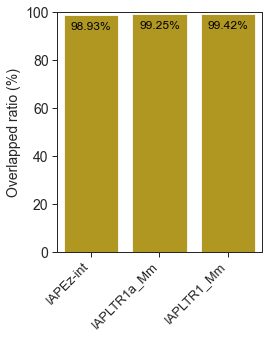

In [74]:
with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 14,
                             'axes.labelsize': 14,
                             'xtick.labelsize': 13,
                             'ytick.labelsize': 14,
                             'legend.fontsize': 14
                         }):
    fig, ax = plt.subplots(figsize = (6.4 * .6, 4.8 * 1), tight_layout = True)
    h = sns.barplot(
        data = woCHM_ratio_df,
        x = 'IAP subfamily',
        y = 'wiCHM_ratio',
        ax = ax,
        color = '#C7A609'
    )
    ax.set_ylim(0,100)
    ax.set_xlabel('')
    ax.set_ylabel('Overlapped ratio (%)')
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = 'right')
    
    s = 0
    for p in h.patches:
        s+= p.get_height()
    for p in h.patches :
        if p.get_height() != 0 :
            ax.text(p.get_x() + p.get_width()/2.,
                    p.get_height() - 7,
                    '{:.2f}%'.format(p.get_height()), 
                    fontsize=12,
                    color='black',
                    ha='center',
                    va='bottom')
    fig.savefig('/mnt/Storage/home/wangyiman/CHMsInOtherContexts/figures/make15_bar_IAPEz_universalCHM_candidateCHM_percentage.pdf', transparent = True)
    

In [67]:
60 / 68

0.8823529411764706

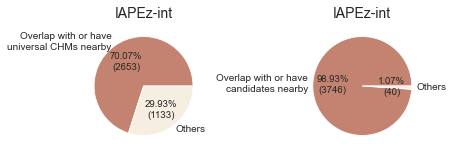

In [27]:
### pie plot (not used)
def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.2f}%\n({:d})".format(pct, absolute)


IAP_woCHM = pd.read_csv(
    '/mnt/Storage/home/wangyiman/CHMsInOtherContexts/CellStateTransition/CHMOrganization/Universal_specific/Features/overlap_IAPEz/stage_CHMs/IAPEz-int_nonCHMnearby_2kb.bed',
    sep = "\t", header = None, 
)
IAP_num_bed = pd.read_csv(
    '/mnt/Storage/home/wangyiman/CHMsInOtherContexts/CellStateTransition/CHMOrganization/Universal_specific/Features/overlap_IAPEz/mm10_euch.IAPEz-int.merged.num.bed',
    sep = "\t",
    header = None,
    names = ['chr', 'start', 'end', 'IAP_num'])

IAP_universal = pd.read_csv(
    '/mnt/Storage/home/wangyiman/CHMsInOtherContexts/CellStateTransition/CHMOrganization/Universal_specific/Features/overlap_IAPEz/IAPEz_universalCHM_overlap.bed',
    sep = "\t", header = None,
)



with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 14,
                             'axes.labelsize': 12,
                             'xtick.labelsize': 10,
                             'ytick.labelsize': 10,
                             'legend.fontsize': 10
                         }):
    fig, axes = plt.subplots(1,2, figsize = (6.4, 4.8), tight_layout = True)
    
    sizes1 = [IAP_universal.shape[0], IAP_num_bed.shape[0] - IAP_universal.shape[0]]
    axes[0].pie(sizes1, 
           explode = [0, 0],
           labels = [f'Overlap with or have\nuniversal CHMs nearby', f'Others'],
           autopct=lambda pct: func(pct, sizes),
           shadow = False, 
           startangle = 0,
           colors = ['#C38370', '#F6EEE0'],
          )
    axes[0].set_title('IAPEz-int')
    
    sizes2 = [IAP_num_bed.shape[0] - IAP_woCHM.shape[0], IAP_woCHM.shape[0]]
    axes[1].pie(sizes2, 
           explode = [0, 0],
           labels = [f'Overlap with or have\ncandidates nearby', f'Others'],
           autopct=lambda pct: func(pct, sizes),
           shadow = False, 
           startangle = 0,
           colors = ['#C38370', '#F6EEE0']
          )
    axes[1].set_title('IAPEz-int')
    
    fig.savefig('/mnt/Storage/home/wangyiman/CHMsInOtherContexts/figures/make15_pie_IAPEz_universalCHM_candidateCHM.pdf', transparent = True)
     
